In [22]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *
%matplotlib inline
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

# A Check about the MSA data.
## focus on the occurrance of '-'

In [3]:
with open("/Users/weilu/Research/server/sep_2020/curated_single_chain_optimization/alignments/1iw6_A_filtered_0.05.seqs") as f:
    a = f.readlines()

In [6]:
a[1]

'SAALWTAFGILVTSSVVFYILLLFIFHVYTFTITATASVCYLLMSVQQGYKPVYWIRYVDWLVTTPLILLDLGDKIVLLIFLDLLMILSGAVGSFVNWQNLFFWGAGMLFYILIVFEVFLLLATSTVSVWSMYPIVWLLADGL-NIMPVDLETILYALLDISAKCAFGFVLLL\n'

In [24]:
import glob

In [27]:
all_alignments = glob.glob("/Users/weilu/Research/server/sep_2020/curated_single_chain_optimization/alignments/*.seqs")

In [28]:
len(all_alignments)

1747

In [37]:
info_ = []
for alignment in all_alignments:
    pdb = alignment.split("/")[-1][:6]
    with open(alignment) as f:
        a = f.readlines()
    for i, line in enumerate(a):
        seq = line.strip()

        dash_count = seq.count("-")
        length = len(seq)
        dash_ratio = dash_count/ length
        info_.append([pdb, length, i, dash_ratio])
data = pd.DataFrame(info_, columns=["Protein", "Length", "i", "Ratio"])

In [42]:
data.to_csv("/Users/weilu/Research/data/alignment_info.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc65905ccc0>]],
      dtype=object)

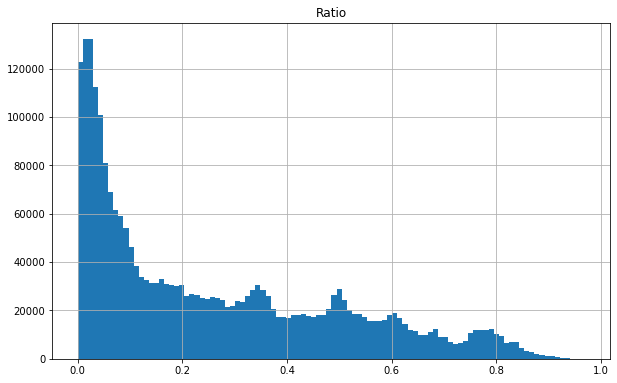

In [51]:
data.hist("Ratio", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc658118358>]],
      dtype=object)

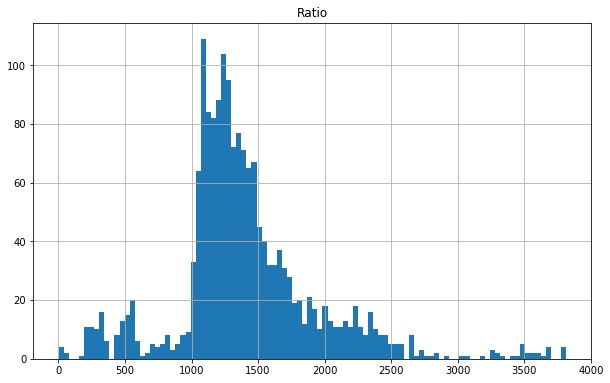

In [50]:
data.groupby("Protein")["Ratio"].count().reset_index().hist("Ratio", bins=100)

# after filter out those having more than 5% of dash.
# and filter out those protein that left with less than 100 MSA.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6547ca978>]],
      dtype=object)

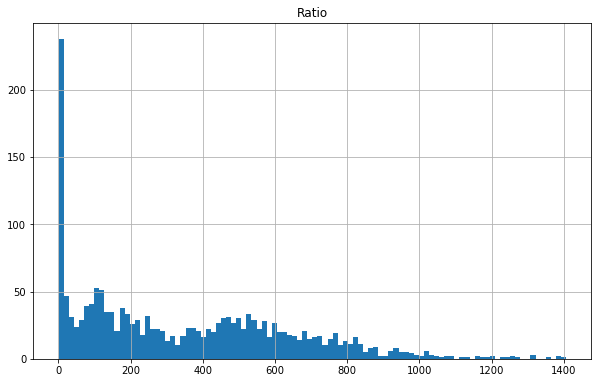

In [74]:
data.query("Ratio < 0.05").groupby("Protein")["Ratio"].count().reset_index().hist("Ratio", bins=100)

In [78]:
new_pdb_list = data.query("Ratio < 0.05").groupby("Protein")["Ratio"].count().reset_index().query("Ratio > 100")["Protein"].to_list()

In [79]:
len(new_pdb_list)

1296

In [80]:
data.query("Protein in @new_pdb_list").reset_index(drop=True)

,Protein,Length,i,Ratio
0,2zzl_A,173,0,0.000000
1,2zzl_A,173,1,0.005780
2,2zzl_A,173,2,0.017341
3,2zzl_A,173,3,0.011561
4,2zzl_A,173,4,0.011561
...,...,...,...,...
1768945,6s8h_F,168,1352,0.232143
1768946,6s8h_F,168,1353,0.232143
1768947,6s8h_F,168,1354,0.232143
1768948,6s8h_F,168,1355,0.232143


## For those satisfy the condition of with more than 100 MSA left.
### we wrote those MSA information into a new folder and file. 

In [100]:
with open("/Users/weilu/Research/server/sep_2020/curated_single_chain_optimization/pdb_list_after_filtering.txt", "w") as out:
    for pdb in new_pdb_list:
        out.write(f"{pdb}\n")

In [84]:
frame_selected = data.query("Protein =='2zzl_A' and Ratio < 0.05")["i"].to_list()

In [85]:
len(frame_selected)

533

In [88]:
frame_selected[-1]

1214

In [99]:
for pdb in new_pdb_list:
    frame_selected = data.query(f"Protein =='{pdb}' and Ratio < 0.05")["i"].to_list()
    with open(f"/Users/weilu/Research/server/sep_2020/curated_single_chain_optimization/alignments/{pdb}_filtered_0.05.seqs") as f:
        a = f.readlines()
    with open(f"/Users/weilu/Research/server/sep_2020/curated_single_chain_optimization/alignments_filtered/{pdb}_filtered_0.05.seqs", "w") as out:
        for line in np.array(a)[frame_selected]:
            out.write(line)

In [90]:
pdb = "2zzl_A"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68d9c2d30>]],
      dtype=object)

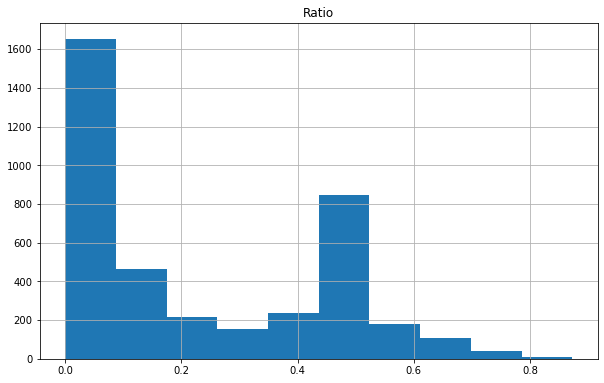

In [36]:
data.hist("Ratio")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68a137b38>]],
      dtype=object)

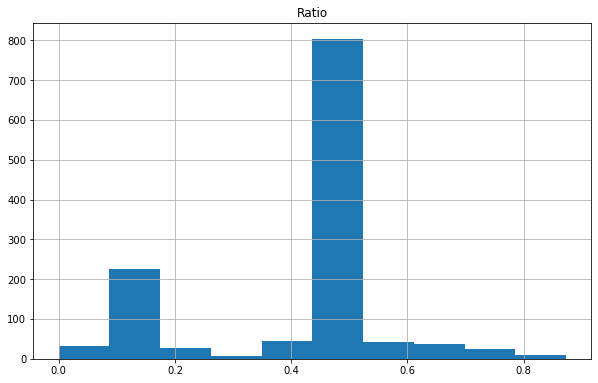

In [35]:
data.query("Protein == '5ejz_A'").hist("Ratio")

In [101]:
all_alignments = glob.glob("/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/alignments/*.seqs")

In [114]:
alignment.split("/")[-1][:-19]

'1py6_SD'

In [115]:
info_ = []
for alignment in all_alignments:
    pdb = alignment.split("/")[-1][:-19]
    with open(alignment) as f:
        a = f.readlines()
    for i, line in enumerate(a):
        seq = line.strip()

        dash_count = seq.count("-")
        length = len(seq)
        dash_ratio = dash_count/ length
        info_.append([pdb, length, i, dash_ratio])
data = pd.DataFrame(info_, columns=["Protein", "Length", "i", "Ratio"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc637308550>]],
      dtype=object)

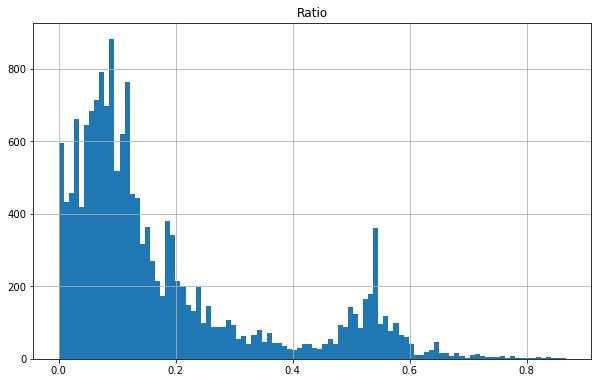

In [116]:
data.hist("Ratio", bins=100)

In [120]:
data.query("Ratio < 0.06").groupby("Protein")["Ratio"].count().reset_index()

,Protein,Ratio
0,1iwg,431
1,1j4n,101
2,1kpl,223
3,1occ,109
4,1pv6,132
5,1py6,166
6,1py6_SD,441
7,1u19,576
8,2bg9,740
9,2bl2,273


In [121]:
new_pdb_list = data.query("Ratio < 0.06").groupby("Protein")["Ratio"].count().reset_index()["Protein"].to_list()

In [126]:
with open("/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/pdb_list.txt", "w") as out:
    for pdb in new_pdb_list:
        out.write(f"{pdb}\n")

In [125]:
for pdb in new_pdb_list:
    frame_selected = data.query(f"Protein =='{pdb}' and Ratio < 0.06")["i"].to_list()
    with open(f"/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/alignments/{pdb}_filtered_0.05.seqs") as f:
        a = f.readlines()
    with open(f"/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/alignments_filtered/{pdb}_filtered_0.06.seqs", "w") as out:
        for line in np.array(a)[frame_selected]:
            out.write(line)

In [130]:
a = np.loadtxt("/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/proteins_name_list/proteins_name_list_0.txt", dtype=str)

In [145]:
read_column_from_file("/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/proteins_name_list/proteins_name_list_0.txt", 1)

['1iwg']

In [143]:
for b in a:
    print(b)

1iwg


In [5]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cluster20.dat")
info = pd.read_csv("/Users/weilu/Research/database/gxxxg_index_dic_v5.csv", index_col=0)
interaction_index_dic = {}
n = 20
for i, line in info.iterrows():
    # print(i, line["i"])
    interaction_index_dic[f"{line['Direction']}_{line['i']}"] = line["Group"]

In [36]:
from Bio.PDB.Polypeptide import one_to_index
from Bio.PDB.Polypeptide import three_to_index

def get_400_based_index(res1_1, res1_2):
    index = three_to_index(res1_1)*20 + three_to_index(res1_2)
    return index
def get_overall_index_v5(index1, index2, direction, interaction_index_dic):
    n = 20
    # plus 1, total parameters. 21*20/2 = 210
    n_shift = 210
    new_index1 = interaction_index_dic[f"{direction}_{index1}"]
    new_index2 = interaction_index_dic[f"{direction}_{index2}"]
    if new_index1 > new_index2:
        new_index1, new_index2 = new_index2, new_index1
    overall_index = ((2*n-(new_index1-1))*(new_index1)/2 + new_index2 - new_index1)
    if direction == "anti":
        overall_index += n_shift
    return int(overall_index)

def get_interaction_index_from_four_residues_v5(res1_1, res1_2, res2_1, res2_2, direction, interaction_index_dic=interaction_index_dic):

    index1 = get_400_based_index(res1_1, res1_2)
    if direction == "parallel":
        index2 = get_400_based_index(res2_1, res2_2)
    elif direction == "anti":
        index2 = get_400_based_index(res2_2, res2_1)
    else:
        print("unknown direction")
        raise
    index = get_overall_index_v5(index1, index2, direction, interaction_index_dic)

    return index

def compute_gxxxg_energy(structure, gamma, n_parameters, detailedOutput=False, sequence=None, get_interaction_index=get_interaction_index_from_four_residues_v5):
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    if sequence is None:
        sequence = get_sequence_from_structure(structure)

    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)

    e_gxxxg = 0.0
    e_gxxxg_parallel = 0.0
    e_gxxxg_anti_parallel = 0.0
    data_info = []
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            for shift_to_res2_2, direction in zip([-4, 4], ["anti", "parallel"]):
                res1_2_globalindex = res1globalindex + 4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                # for shift_to_res2_2 in [-4, 4]:

                # consider parallel, and anti-parallel.
                res2_2_globalindex = res2globalindex + shift_to_res2_2
                res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                if res1_2 == -1 or res2_2 == -1:
                    continue
                if direction == "parallel":
                    sep = res2globalindex - res1globalindex
                elif direction == "anti":
                    sep = res2_2_globalindex - res1globalindex
                if sep >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                    rij = get_distance_between_two_residues(res1, res2)

                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
    #                 if rij_2 > (r_max+2):
    #                     continue
                    try:
                        resName_1_1 = one_to_three(sequence[res1globalindex])
                        resName_1_2 = one_to_three(sequence[res1_2_globalindex])
                        resName_2_1 = one_to_three(sequence[res2globalindex])
                        resName_2_2 = one_to_three(sequence[res2_2_globalindex])
                    except:
                        print(res1globalindex, res2globalindex)
                        continue
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    # interaction_index = get_interaction_index_from_four_residues_v2(resName_1_1, resName_1_2, resName_2_1, resName_2_2)
                    interaction_index = get_interaction_index(resName_1_1, resName_1_2, resName_2_1, resName_2_2, direction)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    # phi_gxxxg_well[interaction_index] += phi_
                    if shift_to_res2_2 == -4:
                        e_gxxxg_anti_parallel += gamma[interaction_index] * phi_
                    else:
                        e_gxxxg_parallel += gamma[interaction_index] * phi_
                    if abs(phi_) > 0.1:
                        data_info.append([res1globalindex, res2globalindex, res1index, res2index, resName_1_1, resName_1_2, resName_2_1, resName_2_2, direction, gamma[interaction_index], interaction_index, phi_])
                    # print(res1globalindex, res2globalindex, resName_1_1, resName_2_1, gamma[interaction_index], phi_)
    e_gxxxg = e_gxxxg_parallel + e_gxxxg_anti_parallel
    # print(e_gxxxg)
    if detailedOutput:
        return pd.DataFrame(data_info, columns=["g_index_1", "g_index_2", "res1_index", "res2_index", "resName_1_1", "resName_1_2", "resName_2_1", "resName_2_2", "direction", "gamma", "interaction_index", "phi"])
    else:
        return e_gxxxg

In [7]:
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_gamma"
# gamma = np.loadtxt(fileLocation)
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
# gamma = np.loadtxt(fileLocation)

pre = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/"
sequence = read_fasta(f"{pre}/crystal_structure.fasta")

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/lastFrame"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info = compute_gxxxg_energy(structure[0], -gamma, n_parameters=420, detailedOutput=True, sequence=sequence)

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/crystal_structure"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info_native = compute_gxxxg_energy(structure[0], -gamma, n_parameters=420, detailedOutput=True, sequence=sequence)






In [37]:
data_test = compute_gxxxg_energy(structure[0], -gamma, n_parameters=420, detailedOutput=True, sequence=seq1)

88 108
88 108
88 104
88 104


In [50]:
data_fake = compute_gxxxg_energy(structure[0], -gamma, n_parameters=420, detailedOutput=True, sequence=fake_seq)

121 145
121 145
121 148
121 148
125 145
125 145
125 141
125 141


In [44]:
fake_seq = list(seq1)
np.random.shuffle(fake_seq)
fake_seq = "".join(fake_seq)

In [49]:
fake_seq

'TDIVIYSGNILEIQRAVAIPAVMITDNGVLLEMSYICSALVNLISTTIGGLVQLNTVGLSVSIIILLGIAEREFVFLAGATIIIFLAFSAAIRLILIYSKVHGSIRPSLISGITVLAMKFFSIVF-TRVTLSPYLGVWAGLDPALPVTIIVCMLTLFALAMASTLLLA'

In [48]:
seq1

'AVYIKEAIQMCYQSIILALALVVGIIYLFLGNIRAVIVPAVTLPVSLVGACLGLWLFGLTINIFTLLAIILSVAIVTDDSVVMTESIYHRVE-RGDSPLNAAATGSRNVIFAILSTSIILLAVFMPLLFIGGISGTLFREMAITLSITIVISTFTALSIAPMLGSKLL'

In [40]:
data_test

,g_index_1,g_index_2,res1_index,res2_index,resName_1_1,resName_1_2,resName_2_1,resName_2_2,direction,gamma,interaction_index,phi
0,6,62,7,63,ALA,CYS,ILE,LEU,parallel,-0.577268,48,0.998908
1,14,46,15,47,ILE,LEU,LEU,LEU,anti,-2.115066,418,0.135374
2,17,72,18,73,ALA,VAL,VAL,THR,parallel,-1.159326,128,1.000000
3,18,39,19,40,LEU,VAL,ALA,VAL,anti,-2.352880,355,0.991449
4,18,43,19,44,LEU,VAL,PRO,ALA,anti,-2.144766,343,0.912705
...,...,...,...,...,...,...,...,...,...,...,...,...
65,112,152,113,153,ILE,SER,THR,ILE,anti,-1.781529,405,0.251958
66,116,152,117,153,SER,LEU,THR,ILE,anti,-1.964011,406,1.000000
67,119,148,120,149,LEU,PHE,ILE,LEU,anti,-2.349330,266,1.000000
68,120,145,121,146,LEU,MET,SER,ALA,anti,-1.231626,269,0.981388


In [41]:
data_info_native

,g_index_1,g_index_2,res1_index,res2_index,resName_1_1,resName_1_2,resName_2_1,resName_2_2,direction,gamma,interaction_index,phi
0,6,62,7,63,SER,VAL,THR,PHE,parallel,-1.088887,77,0.998908
1,14,46,15,47,LEU,ILE,LEU,VAL,anti,-2.349330,266,0.135374
2,17,72,18,73,ALA,VAL,ILE,VAL,parallel,-1.646851,170,1.000000
3,18,39,19,40,ILE,PHE,THR,THR,anti,-2.197749,324,0.991449
4,18,43,19,44,ILE,PHE,PRO,THR,anti,-1.684553,323,0.912705
...,...,...,...,...,...,...,...,...,...,...,...,...
65,112,152,113,153,LEU,ALA,VAL,MET,anti,-1.872656,409,0.251958
66,116,152,117,153,ALA,SER,VAL,MET,anti,-2.356163,310,1.000000
67,119,148,120,149,LEU,PHE,MET,ILE,anti,-2.641111,262,1.000000
68,120,145,121,146,SER,VAL,VAL,SER,anti,-1.781529,405,0.981388


In [51]:
(data_fake["gamma"] * data_fake["phi"]).sum()

-98.59105840825087

In [39]:
(data_test["gamma"] * data_test["phi"]).sum()

-110.67986583184359

In [13]:
(data_info_native["gamma"] * data_info_native["phi"]).sum()

-110.31017161605686

In [16]:
with open("/Users/weilu/Research/server/aug_2020/MSA/alignments/1iwg_filtered_0.05.seqs") as f:
    a = f.readlines()

In [19]:
a = [b.strip() for b in a]

In [30]:
seq1 = a[2]

In [31]:
sequence == seq1

False

In [34]:
data_info_native

,g_index_1,g_index_2,res1_index,res2_index,resName_1_1,resName_1_2,resName_2_1,resName_2_2,direction,gamma,interaction_index,phi
0,6,62,7,63,SER,VAL,THR,PHE,parallel,-1.088887,77,0.998908
1,14,46,15,47,LEU,ILE,LEU,VAL,anti,-2.349330,266,0.135374
2,17,72,18,73,ALA,VAL,ILE,VAL,parallel,-1.646851,170,1.000000
3,18,39,19,40,ILE,PHE,THR,THR,anti,-2.197749,324,0.991449
4,18,43,19,44,ILE,PHE,PRO,THR,anti,-1.684553,323,0.912705
...,...,...,...,...,...,...,...,...,...,...,...,...
65,112,152,113,153,LEU,ALA,VAL,MET,anti,-1.872656,409,0.251958
66,116,152,117,153,ALA,SER,VAL,MET,anti,-2.356163,310,1.000000
67,119,148,120,149,LEU,PHE,MET,ILE,anti,-2.641111,262,1.000000
68,120,145,121,146,SER,VAL,VAL,SER,anti,-1.781529,405,0.981388


In [32]:
seq1

'AVYIKEAIQMCYQSIILALALVVGIIYLFLGNIRAVIVPAVTLPVSLVGACLGLWLFGLTINIFTLLAIILSVAIVTDDSVVMTESIYHRVE-RGDSPLNAAATGSRNVIFAILSTSIILLAVFMPLLFIGGISGTLFREMAITLSITIVISTFTALSIAPMLGSKLL'

In [33]:
sequence

'TPFVKISIHEVVKTLVEAIILVFLVMYLFLQNFRATLIPTIAVPVVLLGTFAVLAAFGFSINTLTMFGMVLAIGLLVDDAIVVVENVERVMAEEGLPPKEATRKSMGQIQGALVGIAMVLSAVFVPMAFFGGSTGAIYRQFSITIVSAMALSVLVALILTPALCATML'